<a href="https://colab.research.google.com/github/ishanshah10/Concepts-and-Technologies-of-AI/blob/main/Worksheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.1 Warming Up Exercises - Basic Inspection and Exploration:

Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/bank.csv")
print(df.head())

print(df.info())

object_cols = df.select_dtypes(include='object').columns
print(object_cols)

for col in object_cols:
    print(df[col].unique())

print(df.isnull().sum())

df_numeric = df.drop(columns=object_cols)
print(df_numeric.head())

df_numeric.to_csv("banknumericdata.csv", index=False)

df_numeric_loaded = pd.read_csv("banknumericdata.csv")
print(df_numeric_loaded.describe())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/medical_students_dataset.csv")
print("First 5 rows:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
            print(f"Filled missing values in categorical column '{col}' with mode.")
        else:
            df[col] = df[col].fillna(df[col].mean())
            print(f"Filled missing values in numeric column '{col}' with mean.")

print("\nMissing values after imputation:")
print(df.isnull().sum())

duplicates_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates_count}")
df = df.drop_duplicates()
print("\nDataFrame after removing duplicates:")
print(df.head())

First 5 rows:
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entri

3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"

Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Titanic-Dataset.csv")

subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
first_class_df = subset_df[subset_df['Pclass'] == 1]
fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

print("Mean Fare:", fare_mean)
print("Median Fare:", fare_median)
print("Maximum Fare:", fare_max)
print("Minimum Fare:", fare_min)


Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Titanic-Dataset.csv")

subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
null_count = subset_df['Age'].isnull().sum()
print("Number of null values in 'Age':", null_count)

subset_df_cleaned = subset_df.dropna(subset=['Age'])
print("\nDataFrame after dropping rows with null Age:")
print(subset_df_cleaned.head())


Number of null values in 'Age': 177

DataFrame after dropping rows with null Age:
                                                Name  Pclass     Sex   Age  \
0                            Braund, Mr. Owen Harris       3    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
2                             Heikkinen, Miss. Laina       3  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
4                           Allen, Mr. William Henry       3    male  35.0   

      Fare  Survived  
0   7.2500         0  
1  71.2833         1  
2   7.9250         1  
3  53.1000         1  
4   8.0500         0  


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [ ]:

df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Titanic-Dataset.csv")

embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_encoded], axis=1)
df = df.drop(columns=['Embarked'])
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Mean survival rates by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


/tmp/ipython-input-154143843.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rates.index, y=survival_rates.values, palette="pastel")


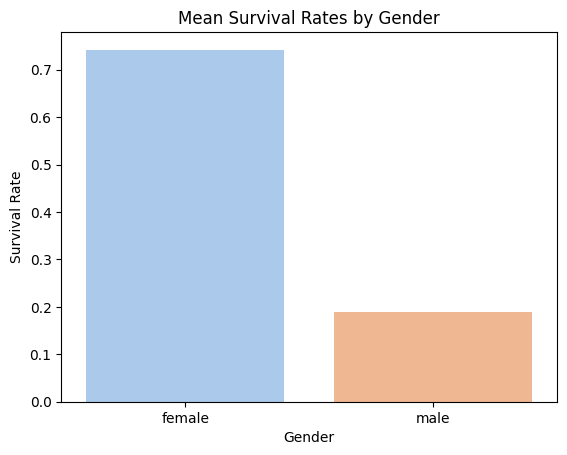

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Titanic-Dataset.csv")
survival_rates = df.groupby('Sex')['Survived'].mean()
print("Mean survival rates by gender:")
print(survival_rates)
sns.barplot(x=survival_rates.index, y=survival_rates.values, palette="pastel")
plt.title("Mean Survival Rates by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.show()


Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

Mean survival rates by gender and embarkation port:
      Sex Embarked  Survived
0  female        C  0.876712
1  female        Q  0.750000
2  female        S  0.689655
3    male        C  0.305263
4    male        Q  0.073171
5    male        S  0.174603


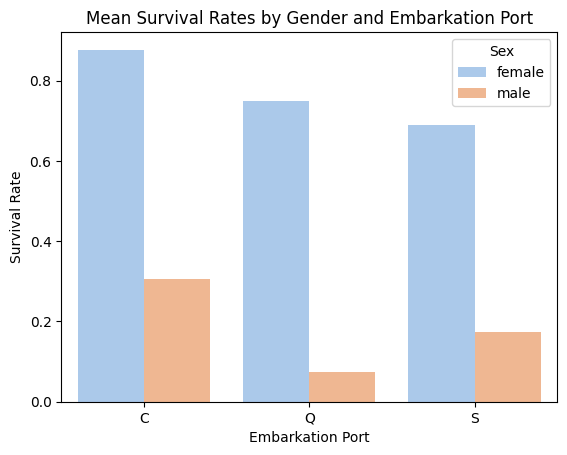

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Titanic-Dataset.csv")
survival_rates = df.groupby(['Sex','Embarked'])['Survived'].mean().reset_index()
print("Mean survival rates by gender and embarkation port:")
print(survival_rates)
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=survival_rates, palette="pastel")
plt.title("Mean Survival Rates by Gender and Embarkation Port")
plt.ylabel("Survival Rate")
plt.xlabel("Embarkation Port")
plt.show()

Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

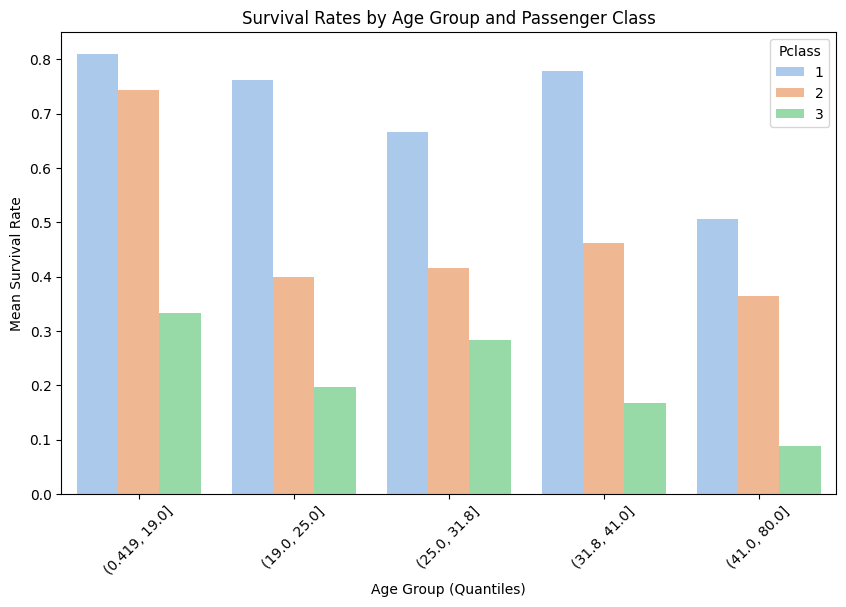

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Titanic-Dataset.csv")

plt.figure(figsize=(10,6))
sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=survival_rates, palette="pastel")
plt.title("Survival Rates by Age Group and Passenger Class")
plt.ylabel("Mean Survival Rate")
plt.xlabel("Age Group (Quantiles)")
plt.xticks(rotation=45)
plt.legend(title='Pclass')
plt.show()